## Project Name:Sentiment Analysis and Visualization of Social Media Data



### By Mehul Chafekar

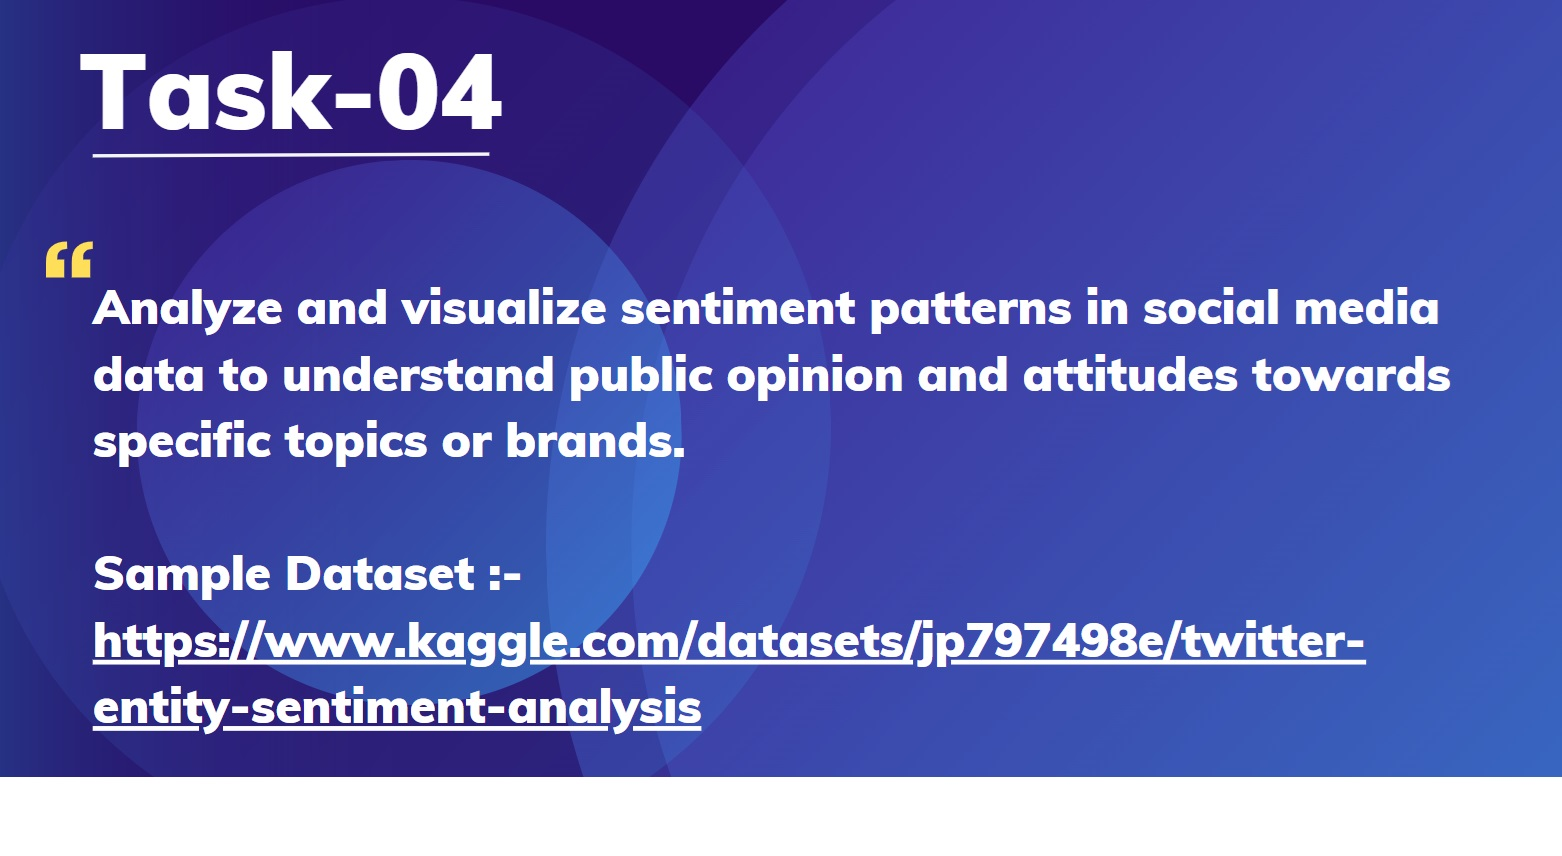

### Project Introduction

- The rise of social media platforms has generated vast amounts of user-generated content, offering valuable insights into public opinion and attitudes. 
- This project aims to leverage sentiment analysis and data visualization techniques to analyze and understand the sentiment patterns within social media data.
- By examining the sentiment expressed in social media posts, this project seeks to uncover trends and insights related to specific topics or brands, providing a deeper understanding of public perception.


### Project Summary

- In this project, we will use Python to analyze and visualize sentiment patterns in social media data.
- The data will be loaded from a CSV file containing columns such as 'ID', 'Text', 'Sentiment', and 'contest'.
- The project will involve data cleaning, sentiment analysis and visualizing the results through various plots, including histograms, word clouds, and donut charts. 
- Additionally, we will explore sentiment distribution across different contests and analyze the length of the text to gain further insights.



### Business Objective

The primary business objective of this project is to provide actionable insights into public opinion and attitudes towards specific topics or brands based on social media data.
By understanding sentiment patterns, businesses can:

- Enhance their marketing strategies by identifying positive and negative sentiment drivers.
- Improve customer engagement by addressing prevalent issues and leveraging positive feedback.
- Monitor brand reputation and track the impact of marketing campaigns.
- Identify emerging trends and topics of interest within the target audience.

## Importing Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [4]:
df= pd.read_csv('twitter_training.csv')
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


## Understanding the Data

In [5]:
df.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


### Load the dataset without a header and assign column names:


In [8]:
# Assign custom column names based on the dataset structure
column_names = ['ID', 'Text', 'Sentiment','contest']
df = pd.read_csv('twitter_training.csv', header=None, names=column_names)
df.head(10)

,ID,Text,Sentiment,contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [26]:
df.tail()

,ID,Text,Sentiment,contest
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


## Shape of the dataframe

In [9]:
df.shape

(74682, 4)

## checking columns in data 

In [27]:
print("\nColumns of the dataframe:")
print(df.columns)


Columns of the dataframe:
Index(['ID', 'Text', 'Sentiment', 'contest'], dtype='object')


## Info of the dataframe

In [10]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [11]:
print("\nInfo of the dataframe:")
df.info()


Info of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Text       74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   contest    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## find the Number of missing values in each column

In [13]:
# Check for missing values 
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
ID             0
Text           0
Sentiment      0
contest      686
dtype: int64


## Dropping missing values which is not useful 

In [14]:
df.dropna(axis=0,inplace=True)

## Again checking the Number of missing values in each column

In [15]:
# Again Check for missing values 
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
ID           0
Text         0
Sentiment    0
contest      0
dtype: int64


## Number of duplicated rows

In [16]:
print("\nNumber of duplicated rows:", df.duplicated().sum())


Number of duplicated rows: 2340


## Dropping Duplicates values which is not useful

In [18]:
df.drop_duplicates(inplace=True)
print("\nAfter drop Number of duplicated rows:", df.duplicated().sum())


After drop Number of duplicated rows: 0


## Again checking Shape of the dataframe

In [19]:
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (71656, 4)


## Count the occurrences of each sentiment

In [21]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Display the counts
print(sentiment_counts)

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: Sentiment, dtype: int64


## Visualize Sentiment Distribution

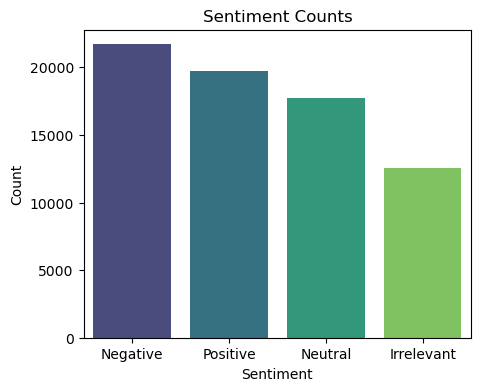

In [24]:
# Visualize the sentiment counts using a bar chart
plt.figure(figsize=(5, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## Install the wordcloud module

In [30]:
pip install wordcloud


     -------------------------------------- 300.4/300.4 kB 6.3 MB/s eta 0:00:00


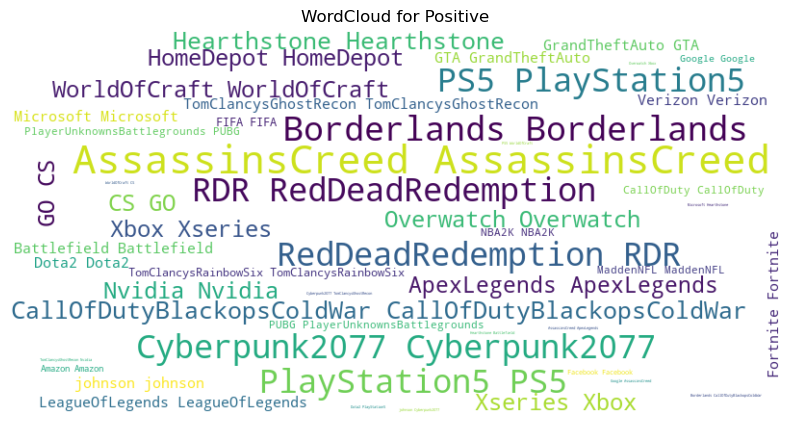

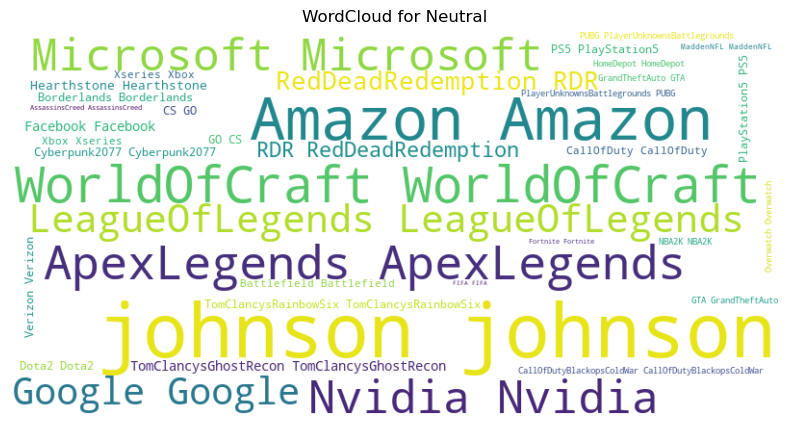

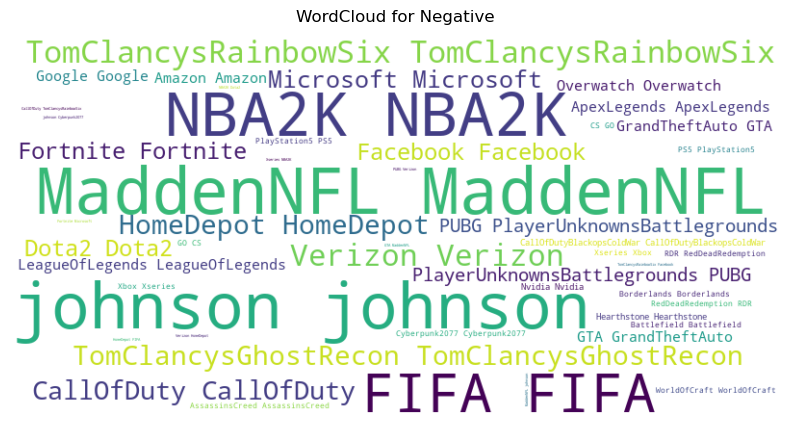

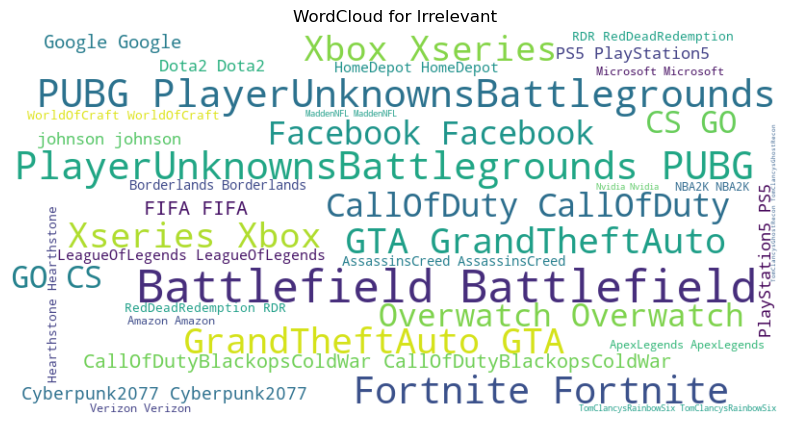

In [31]:
from wordcloud import WordCloud


def generate_wordcloud(sentiment):
    # Combine all text for the given sentiment
    sentiment_text = ' '.join(df[df['Sentiment'] == sentiment]['Text'])
    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment}')
    plt.show()

# Loop through unique sentiments and generate WordCloud for each
for sentiment in df['Sentiment'].unique():
    generate_wordcloud(sentiment)


## Filter rows where 'Entity' column contains "Microsoft"

In [57]:
# Filter rows where 'Entity' column contains "Microsoft" (case insensitive)
brand_data = df[df['Text'].str.contains("Microsoft", case=False)]

# Count the sentiment values
brand_sentiment_counts = brand_data['Sentiment'].value_counts()

# Output the sentiment counts
print(brand_sentiment_counts)

Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: Sentiment, dtype: int64


## Sentiment Distribution for Microsoft

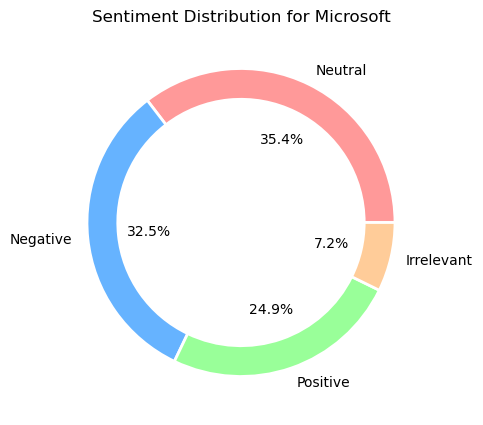

In [60]:
plt.figure(figsize=(10, 5))
brand_sentiment_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'width': 0.2, 'edgecolor': 'w', 'linewidth': 2},
 colors=['#ff9999', '#66b3ff', '#99ff99','#ffcc99'])

plt.title('Sentiment Distribution for Microsoft')
plt.ylabel('')  # Remove y-label for a cleaner look
plt.show()


## Distribution of Text Lengths in Social Media Posts

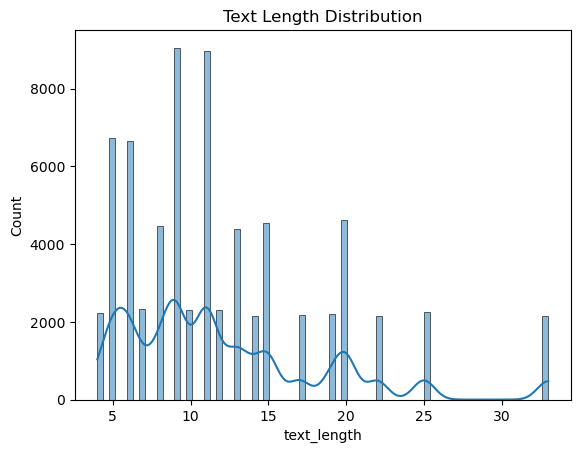

In [37]:
df['text_length'] = df['Text'].apply(len)
sns.histplot(df['text_length'], kde=True)
plt.title('Text Length Distribution')
plt.show()

## Sentiment Analysis Across Top 10 Contests

In [63]:
# Grouping or Filtering
top_contests = df['contest'].value_counts().nlargest(10).index  # Top 10 contests by count
df_top_contests = df[df['contest'].isin(top_contests)]


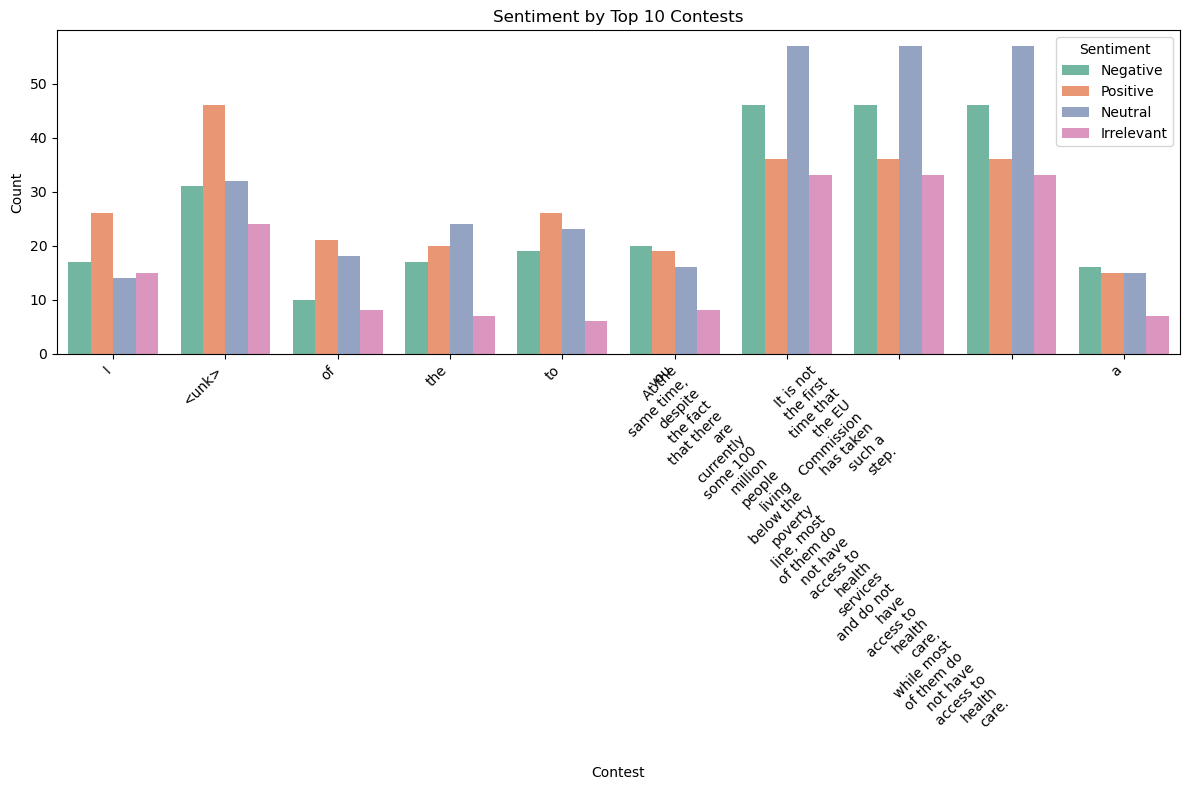

In [54]:
import textwrap

# Create a copy of the DataFrame
df_top_contests_copy = df_top_contests.copy()

# Use .loc to avoid SettingWithCopyWarning
df_top_contests_copy.loc[:, 'wrapped_contest'] = df_top_contests_copy['contest'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=10)))

plt.figure(figsize=(12, 8))
sns.countplot(x='wrapped_contest', hue='Sentiment', data=df_top_contests_copy, palette='Set2')
plt.title('Sentiment by Top 10 Contests')
plt.xlabel('Contest')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjusted label size
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()


### Conclusion

- The sentiment analysis and visualization of social media data offer valuable insights into public opinion and brand perception. 
- This project demonstrates how Python can be used to process, analyze, and visualize large datasets to uncover sentiment patterns. 
- By leveraging these insights, businesses can make informed decisions to improve their strategies and better engage with their audience. 
- The project highlights the importance of data-driven approaches in understanding and responding to public sentiment in an increasingly digital world.
